# Day 3 : Data Loading and Manipulation and Visulatiozation

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, seaborn, LASIO, Welly

## Kindly load the las file of F02-1_logs.las well from the data folder
## Perform the below Tasks:

>1. Plot well logs using matplotlib for every well-log in the las file 
2. Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.
3. Calculate the VP log from the DT sonic curve.
4. Calculate the VP log using AI and RHOB log. 
4. Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes?   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import lasio

from IPython.display import display

In [2]:
F02 = lasio.read("C:/Users/HP/Documents/GitHub/GeoML-2.0/10DaysChallenge/Dutch_F3_Logs/F02-1_logs.las")
display(F02)

In [3]:
df = F02.df()
df.head(7)

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
48.00,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
48.15,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
48.30,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
48.45,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
48.60,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
48.75,NaN,524.0117,NaN,3820525.75,-455.6956,NaN
48.90,NaN,524.0042,NaN,3820580.00,-455.6956,NaN


In [4]:
df.keys()

Index(['RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE'], dtype='object')

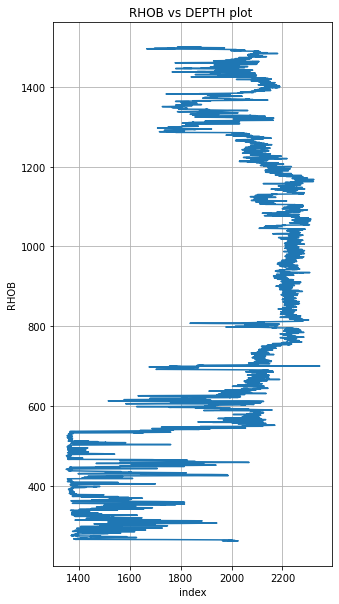

In [5]:
#Test
plt.figure(figsize=(5,10))
plt.plot(df.RHOB, df.index)
plt.title('RHOB vs DEPTH plot ')
plt.xlabel('index')
plt.ylabel('RHOB')
plt.grid()
plt.show();

In [6]:
Logs=[df.keys()]
Logs

[Index(['RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE'], dtype='object')]

Text(0, 0.5, 'DEPTH')

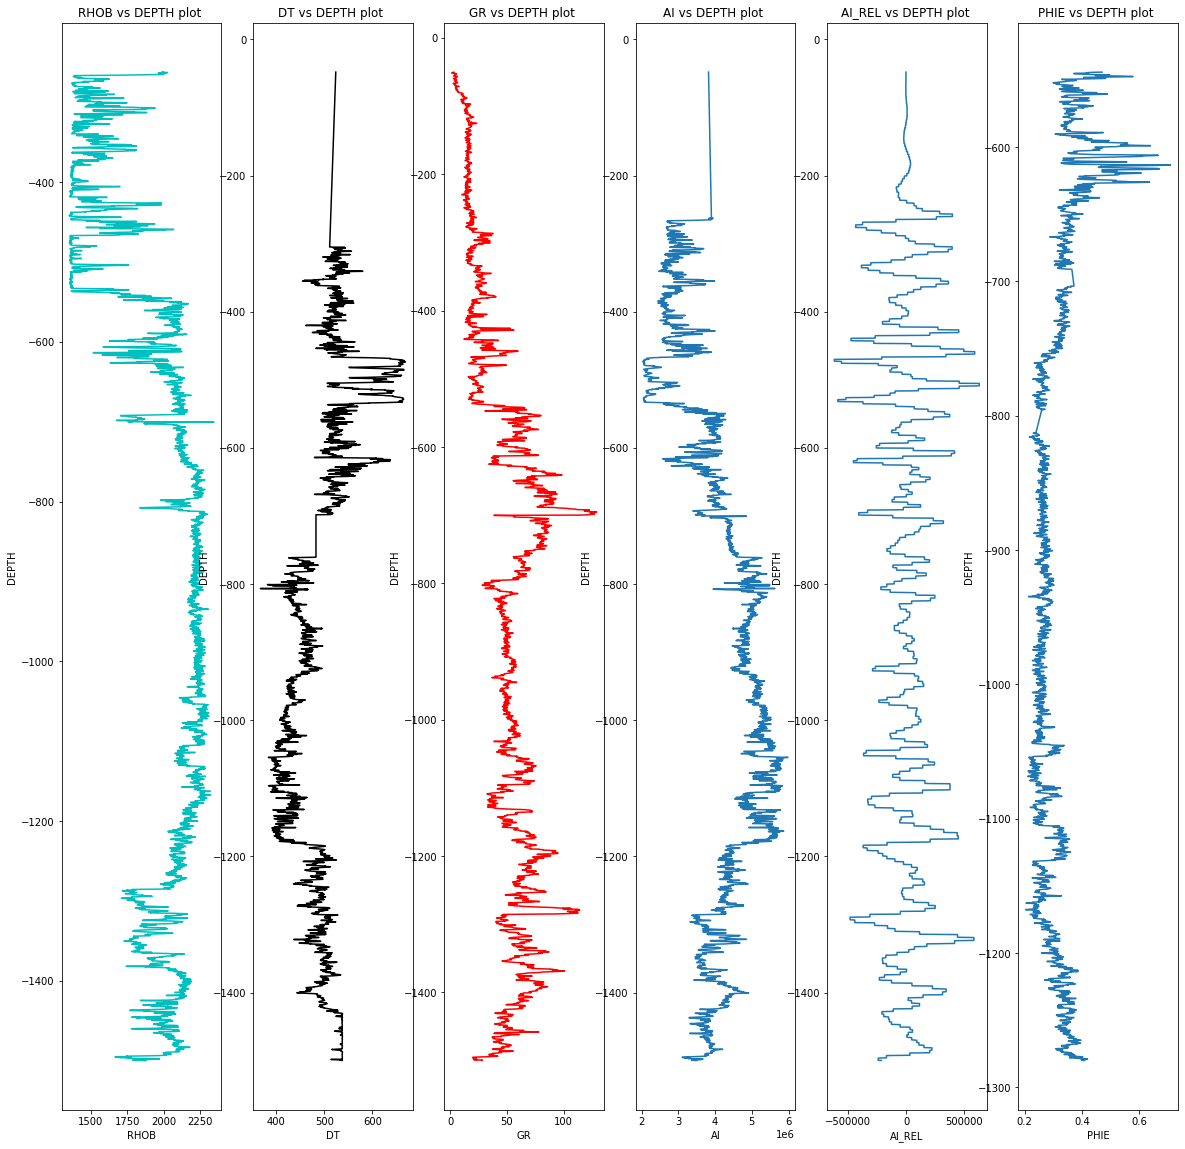

In [7]:
#1.Plot well logs using matplotlib for every well-log in the las file

plt.figure(figsize=(20,20))

# RHOB plot:
plt.subplot(1, 6, 1)
plt.plot(df.RHOB, df.index*-1, label = 'RHOB', c = 'c')
plt.title('RHOB vs DEPTH plot ')
plt.xlabel('RHOB')
plt.ylabel('DEPTH')

# DT plot:
plt.subplot(1, 6, 2)
plt.plot(df.DT, df.index*-1, label = 'DT', c = 'BLACK')
plt.title('DT vs DEPTH plot ')
plt.xlabel('DT')
plt.ylabel('DEPTH')


# GR plot:
plt.subplot(1, 6, 3)
plt.plot(df.GR, df.index*-1, label = 'GR', c = 'r')
plt.title('GR vs DEPTH plot ')
plt.xlabel('GR')
plt.ylabel('DEPTH')

# AI plot:
plt.subplot(1, 6, 4)
plt.plot(df.AI, df.index*-1)
plt.title('AI vs DEPTH plot ')
plt.xlabel('AI')
plt.ylabel('DEPTH')

# AI_REL plot:
plt.subplot(1, 6, 5)
plt.plot(df.AI_REL, df.index*-1)
plt.title('AI_REL vs DEPTH plot ')
plt.xlabel('AI_REL')
plt.ylabel('DEPTH')

# PHIE plot:
plt.subplot(1, 6, 6)
plt.plot(df.PHIE, df.index*-1)
plt.title('PHIE vs DEPTH plot ')
plt.xlabel('PHIE')
plt.ylabel('DEPTH')


In [8]:
#Failed trial to automate the logs plotting process from a list of logs as variables. (Any Advice?)
plt.figure(figsize=(5,10))
Logs=[df.keys()]
for i in range ['RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE']:
    plt.plot(i, df.index)
    plt.title('i vs DEPTH plot ')
    plt.xlabel('i')
    plt.ylabel('Depth')
    plt.grid()
    plt.show();

TypeError: 'type' object is not subscriptable

<Figure size 360x720 with 0 Axes>

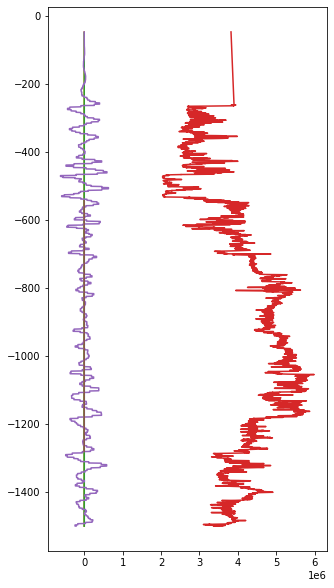

In [10]:
#Incomplete Trial for plotting all logs in one figure. (Any Advice?)
plt.figure(figsize=(5,10))
plt.plot(df, df.index*-1)


In [11]:
#2.Key points statistics
df.describe()

,RHOB,DT,GR,AI,AI_REL,PHIE
count,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000
mean,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522
std,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282
min,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
25%,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900
50%,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000
75%,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800
max,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


In [30]:
#Test
np.percentile(df["GR"], 50)

nan

In [38]:
display ("P90")
display ("RHOB", np.percentile(df["RHOB"], 90))
display ("DT", np.percentile(df["DT"], 90))
display ("GR", np.percentile(df["GR"], 90))
display ("AI", np.percentile(df["AI"], 90))
display ("AI_REL", np.percentile(df["AI_REL"], 90))
display ("PHIE", np.percentile(df["PHIE"], 90))

display ("P10")
display ("RHOB", np.percentile(df["RHOB"], 10))
display ("DT", np.percentile(df["DT"], 10))
display ("GR", np.percentile(df["GR"], 10))
display ("AI", np.percentile(df["AI"], 10))
display ("AI_REL", np.percentile(df["AI_REL"], 10))
display ("PHIE", np.percentile(df["PHIE"], 10))

'P90'

'RHOB'

nan

'DT'

537.53642

'GR'

nan

'AI'

5244555.2

'AI_REL'

244738.2656

'PHIE'

nan

'P10'

'RHOB'

nan

'DT'

425.13829999999996

'GR'

nan

'AI'

2767478.5

'AI_REL'

-229566.6875

'PHIE'

nan

In [12]:
df_new=pd.DataFrame(df)
display(df_new)

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
...,...,...,...,...,...,...
1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN
1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN
1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN


In [13]:
#3: VP from DT (microsec/m) curves
F02['Vp_sonic'] = 10**6/F02['DT']
F02.keys()

['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE', 'Vp_sonic']

In [14]:
#4.Vp from AI and RHOB
F02['Vp_DenAI'] = F02['AI']/F02['RHOB']
F02.keys()

['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE', 'Vp_sonic', 'Vp_DenAI']

In [15]:
df=F02.df()
display(df)

,RHOB,DT,GR,AI,AI_REL,PHIE,Vp_sonic,Vp_DenAI
DEPTH,,,,,,,,
48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN,1908.220327,NaN
48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN,1908.247637,NaN
48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN,1908.274584,NaN
48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN,1908.301531,NaN
48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN,1908.327751,NaN
...,...,...,...,...,...,...,...,...
1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN,1879.089251,1879.120317
1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN,1869.644637,1869.600800
1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN,1861.538055,1861.533886


Text(0, 0.5, 'DEPTH')

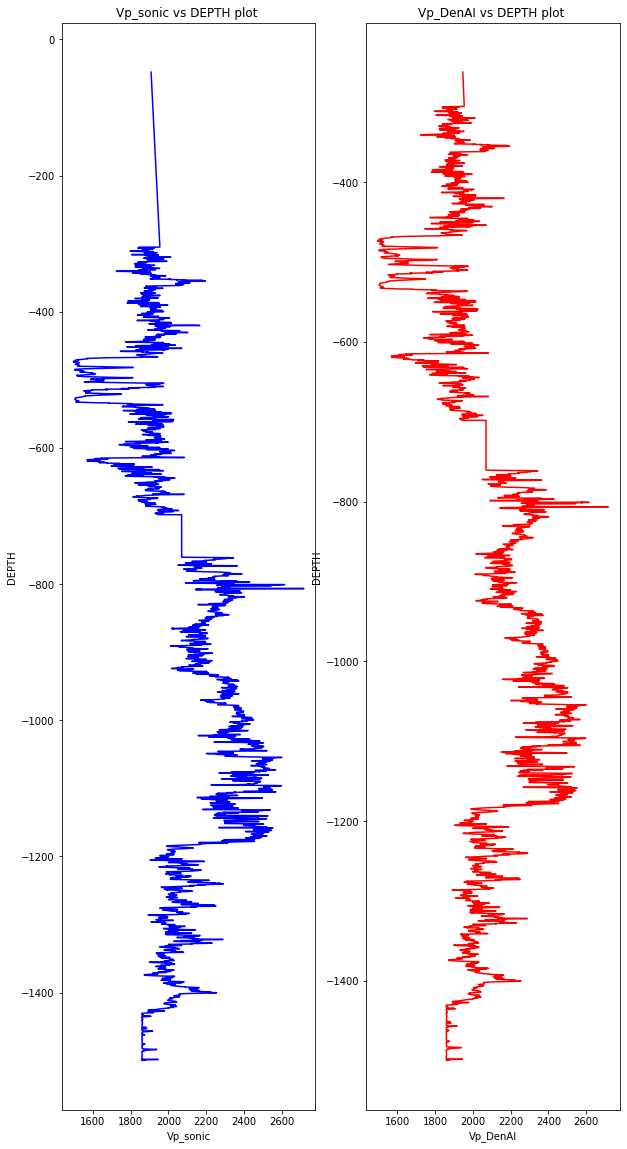

In [16]:
plt.figure(figsize=(10,20))

# Vp_sonic plot:
plt.subplot(1, 2, 1)
plt.plot(df.Vp_sonic, df.index*-1, label = 'Vp_sonic', c = 'b')
plt.title('Vp_sonic vs DEPTH plot ')
plt.xlabel('Vp_sonic')
plt.ylabel('DEPTH')


# Vp_DenAI plot:
plt.subplot(1, 2, 2)
plt.plot(df.Vp_DenAI, df.index*-1, label = 'Vp_DenAI', c = 'r')
plt.title('Vp_DenAI vs DEPTH plot ')
plt.xlabel('Vp_DenAI')
plt.ylabel('DEPTH')


Text(0, 0.5, 'DEPTH')

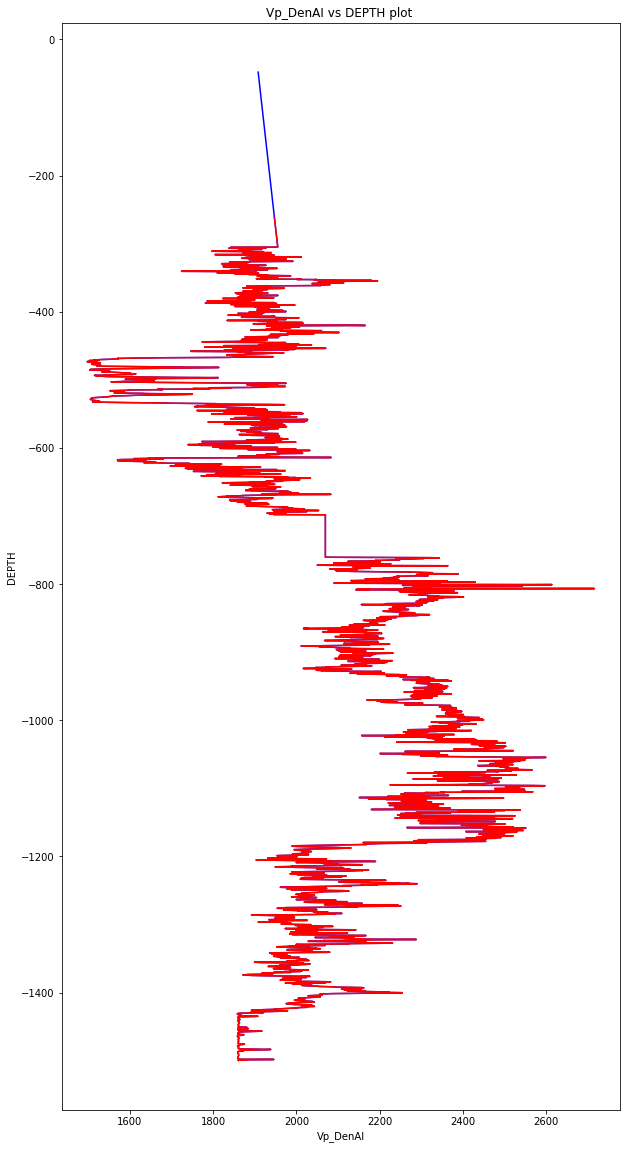

In [17]:
#In the same graph:
plt.figure(figsize=(10,20))

# Vp_sonic plot:
plt.subplot(1, 1, 1)
plt.plot(df.Vp_sonic, df.index*-1, label = 'Vp_sonic', c = 'b')
plt.title('Vp_sonic vs DEPTH plot ')
plt.xlabel('Vp_sonic')
plt.ylabel('DEPTH')


# Vp_DenAI plot:
plt.subplot(1, 1, 1)
plt.plot(df.Vp_DenAI, df.index*-1, label = 'Vp_DenAI', c = 'r')
plt.title('Vp_DenAI vs DEPTH plot ')
plt.xlabel('Vp_DenAI')
plt.ylabel('DEPTH')

IndexError: list index out of range

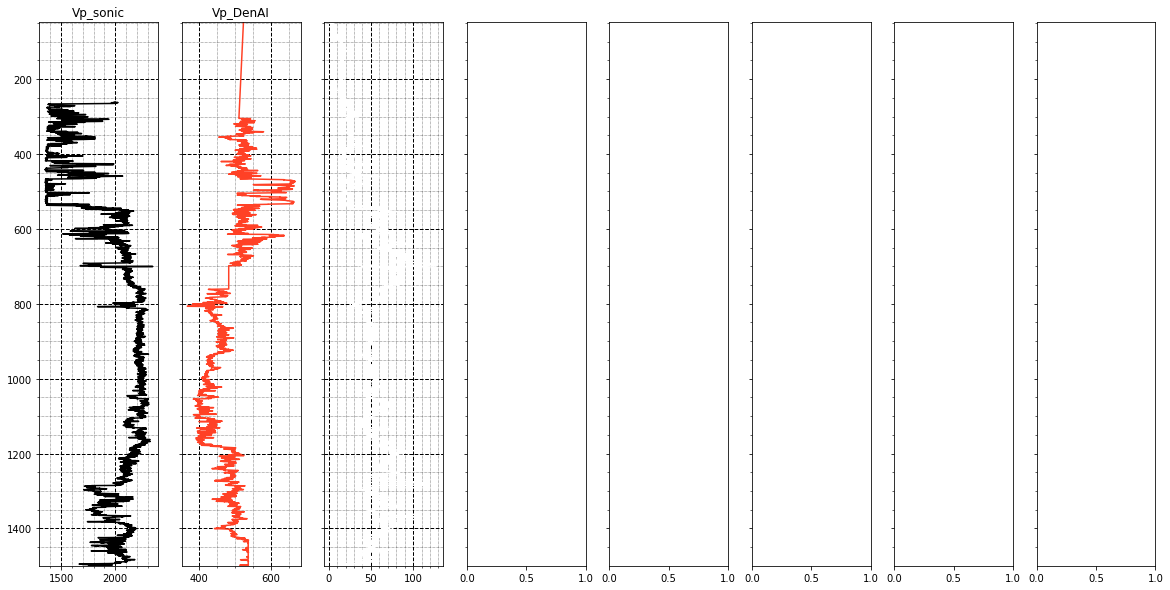

In [18]:
#invalid trial
rows, cols = 1, df.shape[1]

cmap = plt.cm.CMRmap

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10), sharey=True)
names = [ 'Vp_sonic', 'Vp_DenAI']
colrs = [ 'red', 'blue']
for i in range(cols):
    ax[i].plot(df.iloc[:,i], df.index ,linewidth='1.5', color = cmap(i/2))
    ax[i].set_ylim(max(df.index), min(df.index))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
    ax[i].set_title('%s' %names[i])